In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
gender=df['gender'].value_counts()
smoking_history=df['smoking_history'].value_counts()

In [5]:
a = df[(df['gender']=='Female')&(df['smoking_history']=='No Info')]
len(a)

19700

In [6]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical columns
categorical_cols = ['gender','smoking_history']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
# the label_encoder is a instance of LabelEncoder class used to encode the categorical data 
# the fit method learns about the mapping of categorical values and transforms the varibles nto numeric
correlation = data.corr()
correlation['diabetes'].sort_values()

gender                 0.037411
smoking_history        0.094290
heart_disease          0.171727
hypertension           0.197823
bmi                    0.214357
age                    0.258008
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [7]:
data = data.drop('smoking_history',axis=1) # dropping smoking_history beacuse influence of it on diabetes is 9% and it contains 40% No Info values
data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


<Axes: xlabel='diabetes', ylabel='count'>

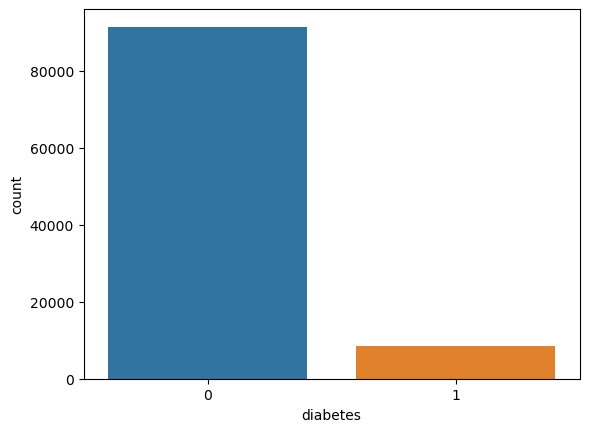

In [8]:
sns.countplot(data=df,x='diabetes') # counting number of diabetic people

<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

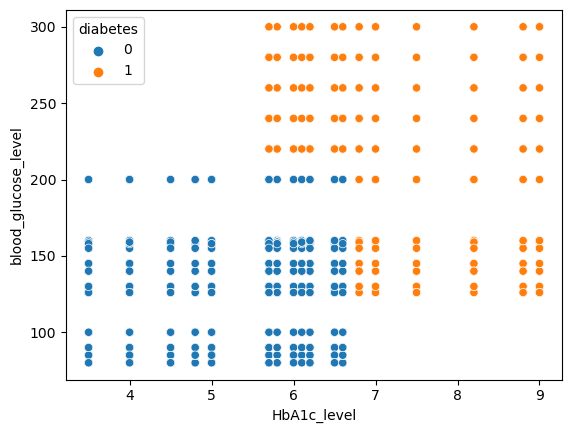

In [9]:
sns.scatterplot(data=df,x='HbA1c_level',y='blood_glucose_level',hue='diabetes') # there are no outliers

In [10]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']

In [11]:
from sklearn.svm import SVC
from sklearn.svm import SVR,LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
svr = SVR()
svm_model=SVC(kernel='linear',C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [15]:
y_pred = np.round(svm_model.predict(X_test))

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
accuracy_score(y_test,y_pred)

0.9603666666666667